In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import bioformats

In [3]:
path = "/Users/Espenel/Desktop/1.czi"

In [4]:
image = bioformats.BioformatsReader(path)

In [5]:
metadata, im = image.get_frame_2D(c=2)

In [6]:
metadata

{'c': 2,
 'frame': 2,
 'mpp': 0.06885262532803958,
 'series': 0,
 't_s': None,
 'x_um': 0,
 'y_um': 0}

In [7]:
img = image.get_stack()

<u2
<u2
<u2


In [8]:
img.shape

(3, 1960, 1960)

In [9]:
import display

In [10]:
result = display.to_rgb(img, auto = False,bf = True, Channel_0 = 'Blue', Channel_1 = 'Red', Channel_2 = "White")

In [11]:
result.shape

(1960, 1960, 3)

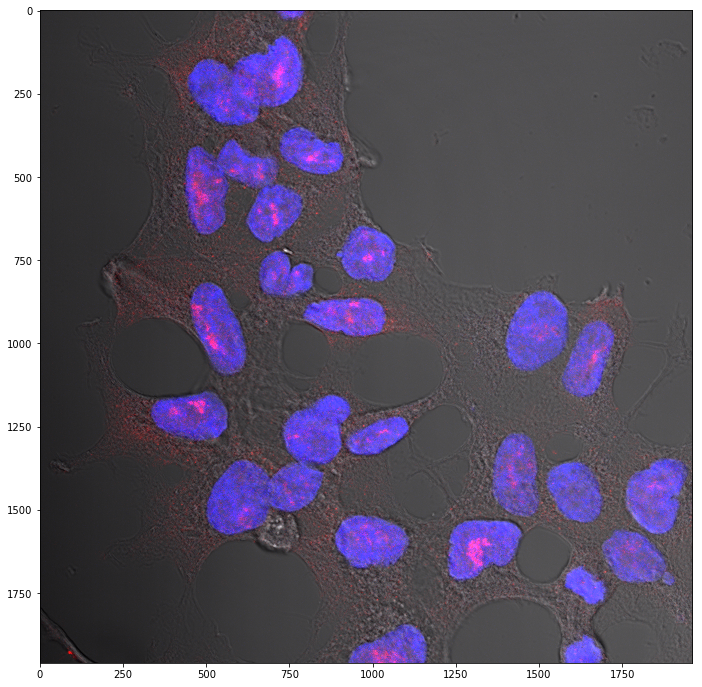

In [57]:
fig, axes = plt.subplots(1,1, figsize=(12,12))
axes.imshow(result)

In [ ]:
image.get_stack()

In [34]:
metadata_row = image.get_metadata_raw()

In [39]:
metadata_row['Information|Image|Channel|Fluor #1']

'DAPI'

In [ ]:
plt.imshow(img[:,:,0])

In [ ]:
import pims

In [ ]:
image = pims.Bioformats(path)

In [ ]:
import sys
sys.getsizeof(image)

In [ ]:
image.iter_axes = 'c'

In [ ]:
img = np.stack((image[0],image[1],image[2]))

In [ ]:
from pims.display import to_rgb

In [ ]:
img.shape

In [ ]:
image_rgb = to_rgb(img)

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,12))
axes.imshow(image_rgb)

In [ ]:
import subprocess

input_image = "/Users/Espenel/Desktop/1.czi"
output_image = "output_image.tiff"
image =  ['bfconvert', "-overwrite", "-nolookup", input_image, output_image]
p = subprocess.run(image, stdout=subprocess.PIPE)

In [ ]:
from PIL import Image
from io import BytesIO

w = 512  # for brevity
h = image[0].shape[0] * w // image[0].shape[1]
img = Image.fromarray((image[0] * 255).astype('uint8')).resize((w, h))
img_buffer = BytesIO()
im.save(img_buffer, format='png')
test =  img_buffer.getvalue()

In [ ]:
import subprocess
from skimage import io

In [ ]:

def read_img_me(path):
    input_image = path
    output_image = "output_image.tiff"
    image =  ['bfconvert', "-overwrite", "-nolookup", input_image, output_image]
    p = subprocess.run(image)
    
    return(io.imread(output_image))

In [ ]:
img = read_img_me(path)

In [ ]:
img.shape

In [ ]:
image[0].nbytes

In [ ]:
img.nbytes

In [ ]:
output_image

In [ ]:
image.iter_axes = 'c'

In [ ]:
import numpy as np

In [ ]:
test = np.array(image[0:3])

In [ ]:
image.shape

In [ ]:
img = img[0,0,:,:,:]

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from skimage import img_as_ubyte

def merge(**kwargs):
    x = kwargs.pop('x')
    y = kwargs.pop('y')
    
    #image_rgb = np.zeros((y,x,4))
    composite = []
    #for i in len(kwargs):
    if 'green' in kwargs:
        img_green = kwargs.pop("green")
        cmap_green = LinearSegmentedColormap.from_list('mycmap', ['black', 'lime'])
        norm_g = plt.Normalize(vmin=img_green.min(), vmax=img_green.max())
        image_g = cmap_green(norm_g(img_green))
        composite.append(image_g)
        #image_rgb[:,:,1] = image_g[:,:,1]     
    
    if 'red' in kwargs:
        
        img_red = kwargs.pop("red")
        cmap_red = LinearSegmentedColormap.from_list('mycmap', ['black', 'red'])
        norm_r = plt.Normalize(vmin=img_red.min(), vmax=img_red.max())
        image_r = cmap_red(norm_r(img_red))
        #image_rgb[:,:,0] = image_r[:,:,0]
        composite.append(image_r)
    
    if 'blue' in kwargs:
        img_blue = kwargs.pop("blue")
        cmap_blue = LinearSegmentedColormap.from_list('mycmap', ['black', 'blue'])
        norm_b = plt.Normalize(vmin=img_blue.min(), vmax=img_blue.max())
        image_b = cmap_blue(norm_b(img_blue))
        #image_rgb[:,:,2] = image_b[:,:,2]
        composite.append(image_b)
    
    if 'orange' in kwargs:
        
        img_orange = kwargs.pop("orange")
        cmap_orange = LinearSegmentedColormap.from_list('mycmap', ['black', 'orange'])
        norm_o = plt.Normalize(vmin=img_orange.min(), vmax=img_orange.max())
        image_o = cmap_orange(norm_o(img_orange))
        #image_rgb[:,:,3] = image_o[:,:,1]
        composite.append(image_o)
    
    return np.stack(composite)

In [ ]:
y,x,c = img.shape

In [ ]:
composite = merge(x = x, y=y, blue = img[:,:,0])

In [ ]:
bf = img[:,:,2]

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,12))

axes.imshow(bf, cmap=plt.cm.gray, vmin=bf.min(), vmax=bf.max(), interpolation='nearest')
axes.imshow(composite[0], alpha = 0.3)
axes.imshow(composite[1], alpha = 0.3)
axes.set_axis_off()

fig.tight_layout()

In [ ]:
from spimagine import volshow

In [ ]:
from spimagine import volshow

In [ ]:
%gui qt5
from spimagine import volshow
import numpy as np

# create a 3d or 4d numpy array
data = np.linspace(0,1,100**3).reshape((100,)*3)          
	
# render the data and returns the widget 
w = volshow(data)       